Importing the library for deep neural networks, pre-installed on Google colab!

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Loading some important stuff

In [ ]:
# Creating a model
from tensorflow.keras.models import Sequential 

# Elements of neural network
from tensorflow.keras.layers import Conv2D, GlobalAvgPool2D, Dense, MaxPool2D, Dropout

# Loss/Error function for binary classification (my face, not my face)
from tensorflow.keras.losses import BinaryCrossentropy 

Creating a deep convolutional neural network

In [ ]:
# Amount of filters in the first layer, e.g. 16
f = 16

m = Sequential([
    #### FEATURE EXTRACTION
    Conv2D(f, (5,5), strides=2, padding='same', input_shape=(128,128,3), activation='relu'),
    Conv2D(f*2, (3,3), strides=2, padding='same', activation='relu'),
    Conv2D(f*4, (3,3), strides=1, padding='same', activation='relu'),
    Conv2D(f*4, (3,3), strides=1, padding='same', activation='relu'),
    MaxPool2D(),
    Conv2D(f*4, (3,3), strides=1, padding='same', activation='relu'),
    Conv2D(f*4, (3,3), strides=1, padding='same', activation='relu'),
    MaxPool2D(),
    GlobalAvgPool2D(),
    # FULLY CONNECTED LAYER
    Dense(256),
    # REMOVE RANDOMLY SOME NEURONS TO FOSTER GENERALIZATION
    Dropout(0.2),
    # 1 output with sigmoid, values between 0 and 1, 
    # closer to 0 - not my face
    # closer to 1 - my face
    Dense(1, activation='sigmoid') 
])

# Model summary

In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        3

# Data loading and preprocessing

In [ ]:
# mount the google drive so that we can access the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from glob import glob
from tqdm.notebook import tqdm
import numpy as np
import imageio as io
from sklearn.model_selection import train_test_split

In [ ]:
# Load the data
# Change the folders accordingly
me = glob("drive/MyDrive/resizedMe/*.jpg")
them = glob("drive/MyDrive/celeba_5000_clean/*.jpg")[:len(me)*2]

# Generate the labels
y = [1] * len(me) + [0] * len(them)

# Load the images and normalize them
X = np.asarray([np.asarray(io.imread(i), dtype=np.float32)/255. for i in tqdm(me+them)])

# Dividing data to evaluate deep neural network
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  0%|          | 0/363 [00:00<?, ?it/s]

In [ ]:
m.compile("adam", BinaryCrossentropy(), metrics=['acc'])

In [ ]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

Train the network for 20 epochs (show each image 20 times), shuffle the images every epoch

In [ ]:
h = m.fit(X_train, y_train, validation_split=0.1, shuffle=True, epochs=20)

Epoch 1/20
9/9 [==============================] - 4s 361ms/step - loss: 0.6411 - acc: 0.6322 - val_loss: 0.6124 - val_acc: 0.6207
Epoch 2/20
9/9 [==============================] - 3s 340ms/step - loss: 0.5667 - acc: 0.6552 - val_loss: 0.4076 - val_acc: 0.6897
Epoch 3/20
9/9 [==============================] - 3s 343ms/step - loss: 0.1626 - acc: 0.9540 - val_loss: 5.8883e-06 - val_acc: 1.0000
Epoch 4/20
9/9 [==============================] - 3s 340ms/step - loss: 3.2489e-06 - acc: 1.0000 - val_loss: 3.1518e-14 - val_acc: 1.0000
Epoch 5/20
9/9 [==============================] - 3s 346ms/step - loss: 5.1343e-12 - acc: 1.0000 - val_loss: 5.3027e-19 - val_acc: 1.0000
Epoch 6/20
9/9 [==============================] - 3s 356ms/step - loss: 3.2021e-14 - acc: 1.0000 - val_loss: 1.3627e-21 - val_acc: 1.0000
Epoch 7/20
9/9 [==============================] - 3s 346ms/step - loss: 4.8686e-13 - acc: 1.0000 - val_loss: 6.3514e-23 - val_acc: 1.0000
Epoch 8/20
9/9 [==============================] - 3s 3

Text(0, 0.5, 'loss')

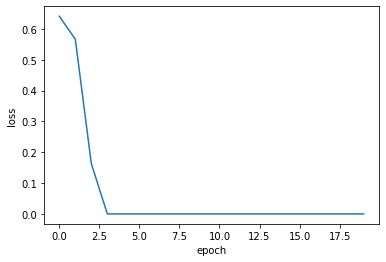

In [ ]:
plt.plot(h.history['loss'])
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
m.evaluate(X_test, y_test)

3/3 [==============================] - 0s 62ms/step - loss: 9.6628e-15 - acc: 1.0000


[9.662845136125704e-15, 1.0]

In [ ]:
y_pred = m.predict(X_test)

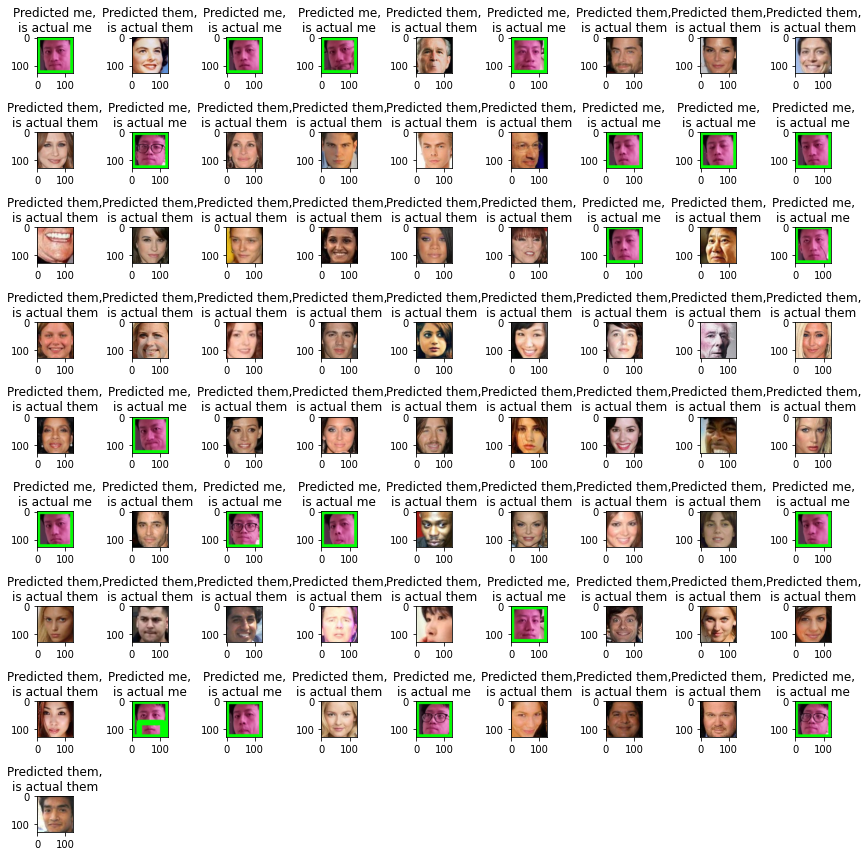

In [ ]:
subplots= np.ceil(np.sqrt(y_pred.shape[0]))

plt.figure(figsize=(12,12))

for i in range(y_pred.shape[0]):
    p = "me" if y_pred[i] > 0.5 else "them"
    a = "me" if y_test[i] > 0.5 else "them"
    
    plt.subplot(subplots, subplots, 1+i)
    plt.imshow(X_test[i])
    plt.title(f"Predicted {p},\nis actual {a}")
    
plt.tight_layout()

Save neural network

In [ ]:
m.save("face.h5")